In [12]:
path='D:/VScode/Last_deglaciation/data/LGMR_SIC_May2023.nc'

# read the nc file from the path
import xarray as xr
import numpy as np

ds_seaice = xr.open_dataset(path)
ds_seaice = ds_seaice.where(ds_seaice.age>=10000, drop=True)

# Calculate the weight based on latitude
weight = np.cos(np.deg2rad(ds_seaice['lat']))
print('shape of the weight:', weight.shape)

weight = xr.where(weight < 0, 0, weight)

ds_seaice['weight'] = weight


ds_seaice

shape of the weight: (96,)


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


<xarray.Dataset>
Dimensions:  (dims: 5, age: 70, lat: 96, lon: 144)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 1.01e+04 1.03e+04 1.05e+04 ... 2.37e+04 2.39e+04
  * dims     (dims) object 'mean              ' ... '97.5percentile    '
Data variables:
    sic      (dims, age, lat, lon) float32 0.0 0.0 0.0 ... 0.9979 0.9979 0.9979
    weight   (lat) float32 0.0 0.03306 0.06609 0.09905 ... 0.06609 0.03306 0.0

In [7]:
# 64.95°S, 120.86°E

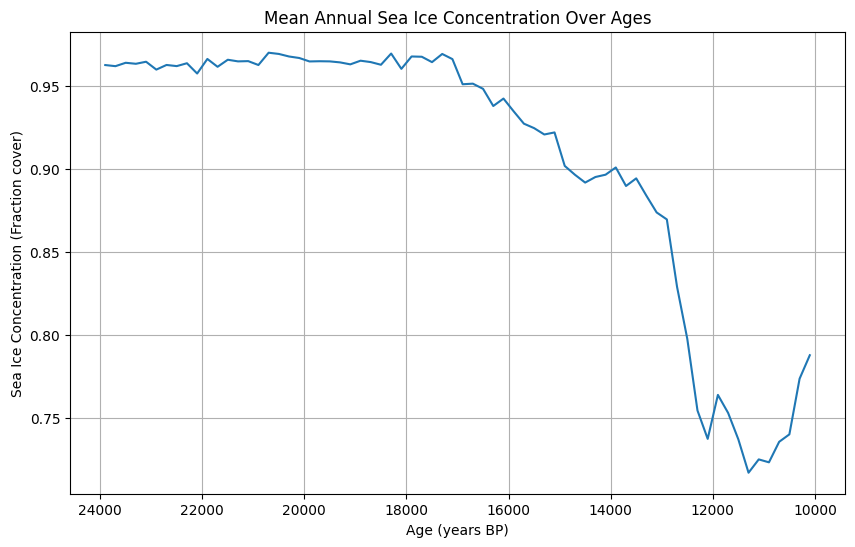

In [14]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt



# Convert your target coordinates to the format used in the dataset
target_lat = -64.95  # Southern latitudes are negative in most datasets
target_lon = 120.86  # Longitude is already in the correct format

# Calculate the absolute differences with dataset coordinates
lat_diff = np.abs(ds_seaice['lat'] - target_lat)
lon_diff = np.abs(ds_seaice['lon'] - target_lon)

# Find the indices of the minimum differences
lat_idx = lat_diff.argmin()
lon_idx = lon_diff.argmin()

# Extract the data for dims[0]
sea_ice_concentration = ds_seaice['sic'].isel(dims=0, lat=lat_idx, lon=lon_idx)


# Plot the data
plt.figure(figsize=(10, 6))
sea_ice_concentration.plot()
plt.title('Mean Annual Sea Ice Concentration Over Ages')
plt.xlabel('Age (years BP)')
plt.ylabel('Sea Ice Concentration (Fraction cover)')
# reverse the x-axis
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()
